# Visualize Activations in Conv Layers
## Adam Optimizer, Dropout 0.2, Batch Normalization, Data Augmentation, Xavier Initialization, Learning Rate Scheduler (Reduce Learning Rate on Plateau)

In [41]:
import torch
from model_utils import TrafficSignsConvNet
from training_utils import load_checkpoint
import matplotlib.pyplot as plt
from data_utils import TrafficSignsDataset

In [42]:
data_dir = 'data/gtsrb-german-traffic-sign/Train'
ckpt_path = 'models/adam_batchnorm_dataaug_xavier_lrscheduler_dropout0.2/best.pt'
num_classes = 5
use_batch_norm = True

In [43]:
# set device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f'device: {device}')

# model
model = TrafficSignsConvNet(
    num_classes=num_classes,
    batch_norm=use_batch_norm
)

# transfer model to device
model = model.to(device)

# load checkpoint
print(f'loading checkpoint {ckpt_path}')
state = load_checkpoint(ckpt_path, model, device=device)

# set to eval mode
model.eval()

device: cpu
loading checkpoint models/adam_batchnorm_dataaug_xavier_lrscheduler_dropout0.2/best.pt


TrafficSignsConvNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout2d(p=0.5, inplace=False)
  (batchnorm1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (batchnorm2): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(12, 18, kernel_size=(5, 5), stride=(1, 1))
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout3): Dropout2d(p=0.5, inplace=False)
  (batchnorm3): BatchNorm2d(18, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(18, 24, kernel_size=(5, 5), stride=(1, 1))
 

In [44]:
imagepaths = ['data/gtsrb-german-traffic-sign/Train/14/00014_00000_00022.png',
              'data/gtsrb-german-traffic-sign/Train/14/00014_00000_00022.png']


In [45]:
# preprocess and convert to tensor
dataset = TrafficSignsDataset(filepaths=imagepaths)

x, label = dataset[0]


prepro: 100%|██████████| 2/2 [00:00<00:00, 250.42 images/s]


In [46]:
# add batch dim
x = x.unsqueeze(0)

In [47]:
# pass through network
if use_batch_norm:
    out1 = model.batchnorm1(model.dropout1(model.pool1(model.relu1(model.conv1(x)))))
    out2 = model.batchnorm2(model.dropout2(model.pool2(model.relu2(model.conv2(out1)))))
    out3 = model.batchnorm3(model.dropout3(model.pool3(model.relu3(model.conv3(out2)))))
    out4 = model.batchnorm4(model.dropout4(model.pool4(model.relu4(model.conv4(out3)))))
else:
    out1 = model.dropout1(model.pool1(model.relu1(model.conv1(x))))
    out2 = model.dropout2(model.pool2(model.relu2(model.conv2(out1))))
    out3 = model.dropout3(model.pool3(model.relu3(model.conv3(out2))))
    out4 = model.dropout4(model.pool4(model.relu4(model.conv4(out3))))

In [48]:
# shape of tensors after passing through conv layers
print(out1.shape)
print(out2.shape)
print(out3.shape)
print(out4.shape)

torch.Size([1, 6, 62, 62])
torch.Size([1, 12, 29, 29])
torch.Size([1, 18, 12, 12])
torch.Size([1, 24, 4, 4])


In [49]:
# plot
def plot_activations(tensor):
    out = tensor.data.numpy()
    num_filters = out.shape[1]
    fig, axs = plt.subplots(
        nrows=1,
        ncols=num_filters,
        figsize=(10, 10),
        dpi=160
    )
    for filter_id in range(num_filters):
        axs[filter_id].imshow(out[0, filter_id])
        axs[filter_id].axis('off')
        axs[filter_id].set_aspect('equal')
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.tight_layout()
    plt.show()

## Activations After Convolutional Layer 1

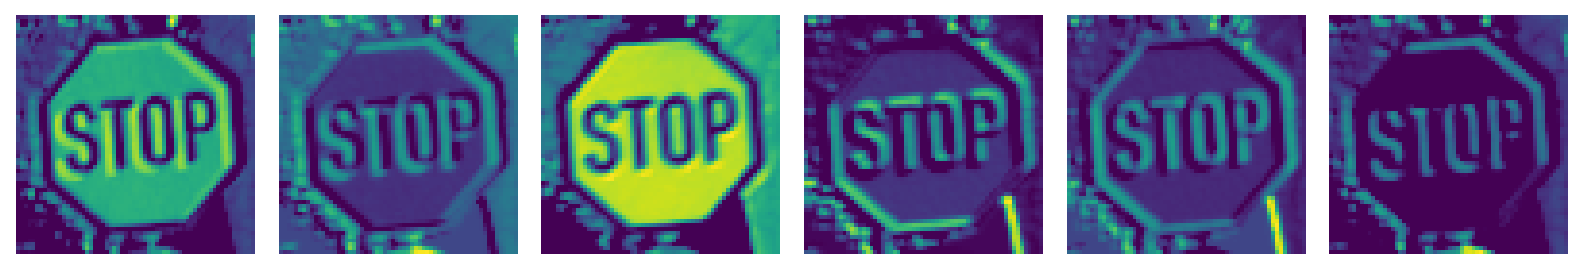

In [50]:
plot_activations(out1)

## Activations After Convolutional Layer 2

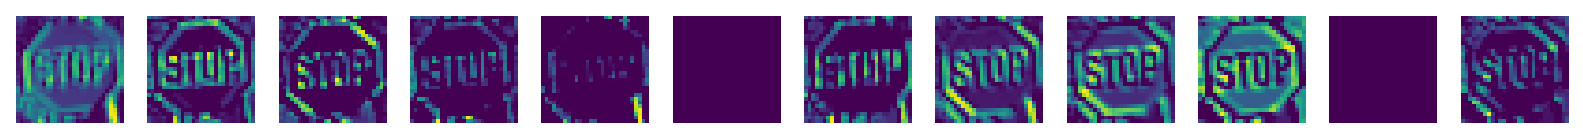

In [51]:
plot_activations(out2)

## Activations After Convolutional Layer 3

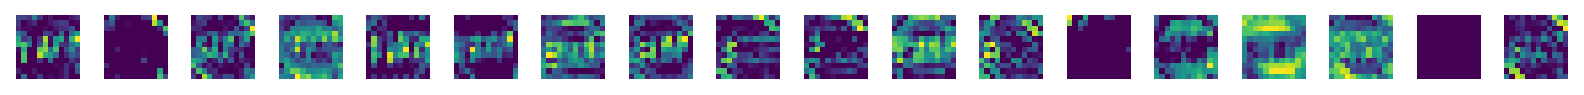

In [52]:
plot_activations(out3)

## Activations After Convolutional Layer 4

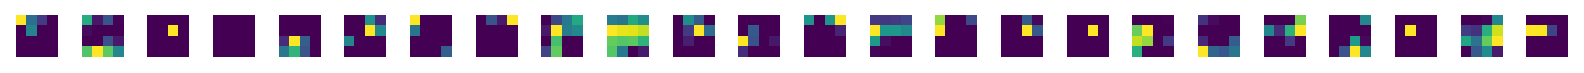

In [53]:
plot_activations(out4)